# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

### Objective:

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

### Dataset:

Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

## Tasks:

### 1. Data Exploration and Preprocessing:
* Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
* Handle missing values as per the best practices (imputation, removal, etc.).
* Apply scaling techniques to numerical features:
* Standard Scaling
* Min-Max Scaling
* Discuss the scenarios where each scaling technique is preferred and why.
### 2. Encoding Techniques:
* Apply One-Hot Encoding to categorical variables with less than 5 categories.
* Use Label Encoding for categorical variables with more than 5 categories.
* Discuss the pros and cons of One-Hot Encoding and Label Encoding.
### 3. Feature Engineering:
* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
### 4. Feature Selection:
* Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
* Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv("F:\\DATA SCIENCE_ExcelR\\Assignments\\EDA2\\adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

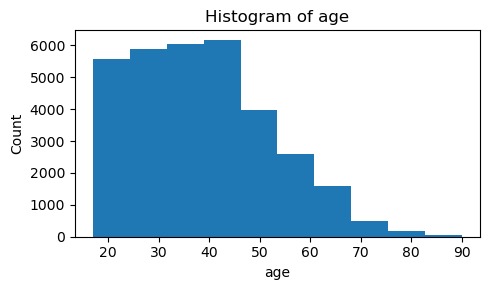

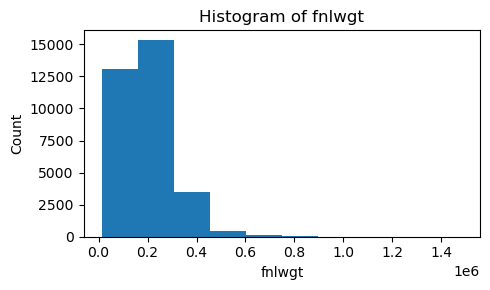

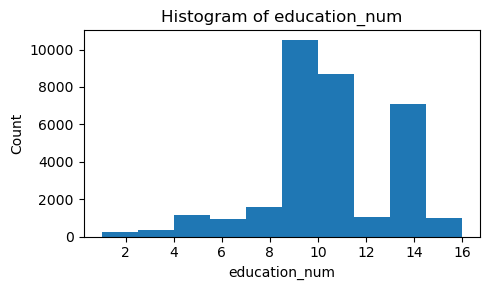

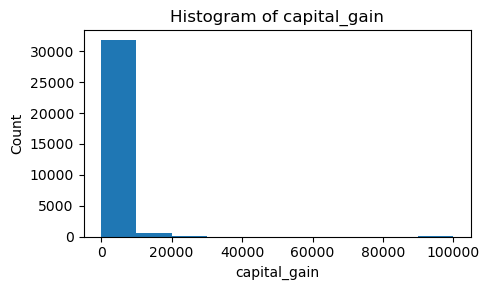

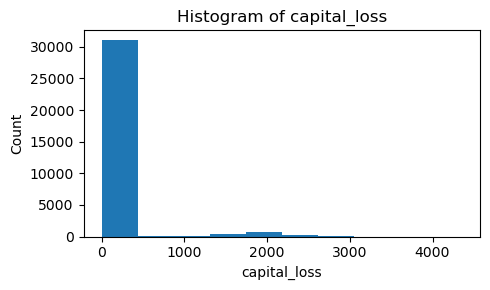

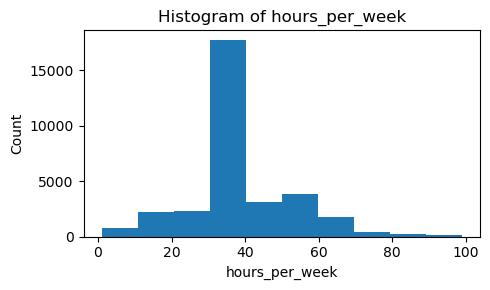

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [21]:
for col in numeric_cols:
    skew=df[col].skew()
    print(f"Skewness of {col} is {skew}")

Skewness of age is 0.5587433694130484
Skewness of fnlwgt is 1.4469800945789826
Skewness of education_num is -0.3116758679102297
Skewness of capital_gain is 11.953847687699799
Skewness of capital_loss is 4.594629121679692
Skewness of hours_per_week is 0.22764253680450092


In [24]:
for col in numeric_cols:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    uwl = q3 + 1.5 * iqr
    lwl = q1 - 1.5 * iqr
    outliers = s[(s < lwl) | (s > uwl)]
    print("columm : ",col)
    print("No of outliers : ",len(outliers))
    percent=(len(outliers)/len(df))*100
    print("Outlier percentage : ",np.round(percent,3))
    print("\n\n")
    


columm :  age
No of outliers :  143
Outlier percentage :  0.439



columm :  fnlwgt
No of outliers :  992
Outlier percentage :  3.047



columm :  education_num
No of outliers :  1198
Outlier percentage :  3.679



columm :  capital_gain
No of outliers :  2712
Outlier percentage :  8.329



columm :  capital_loss
No of outliers :  1519
Outlier percentage :  4.665



columm :  hours_per_week
No of outliers :  9008
Outlier percentage :  27.665





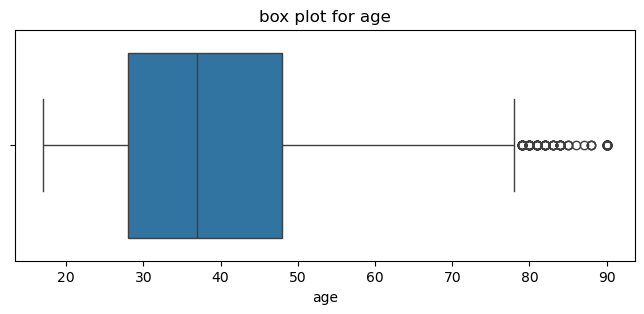

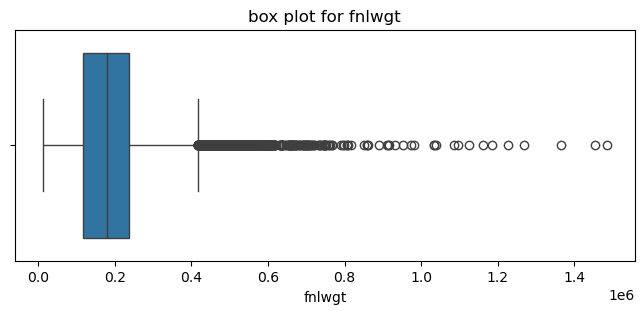

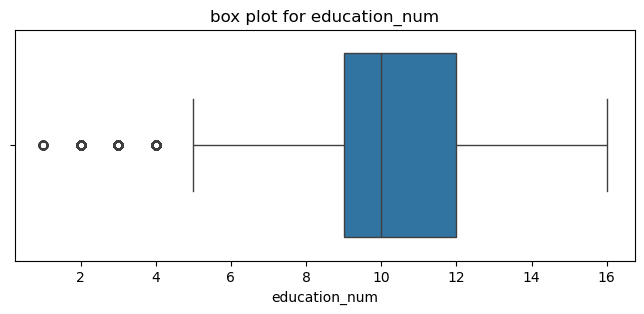

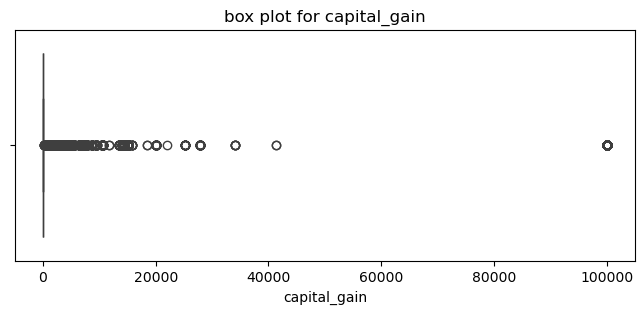

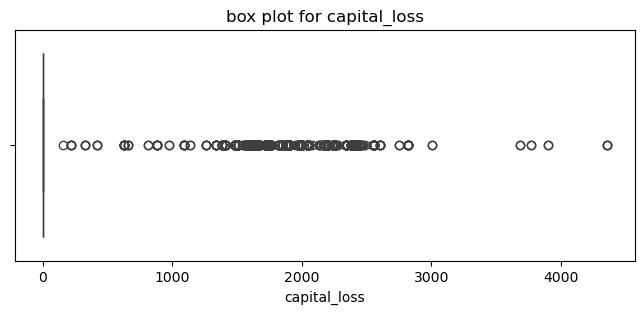

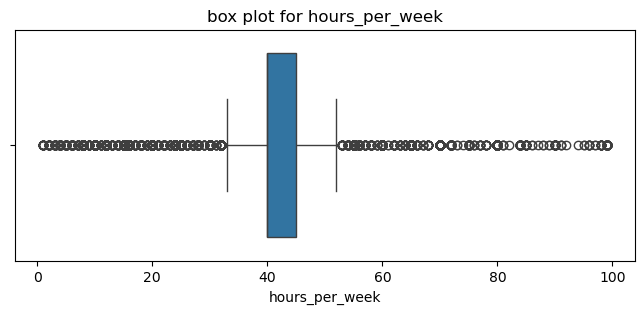

In [26]:
for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"box plot for {col}")
    plt.xlabel(col)
    plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

standard scaling

In [31]:
std_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = std_scaler.fit_transform(df[numeric_cols])
df_standard[numeric_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


StandardScaler transforms data to have mean = 0 and standard deviation = 1

Useful for models like SVM, logistic regression, neural networks

minmax scaling

In [34]:
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])
df_minmax[numeric_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


MinMaxScaler scales values to a 0–1 range.

Useful when features need to be in the same range, e.g., neural networks with sigmoid activation or distance-based algorithms like KNN.

In [37]:
categorical_cols = df.select_dtypes(include='object').columns
print(df[categorical_cols].nunique())

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64


In [39]:
df_temp = df.drop('native_country', axis=1)
categorical_cols = df_temp.select_dtypes(include='object').columns

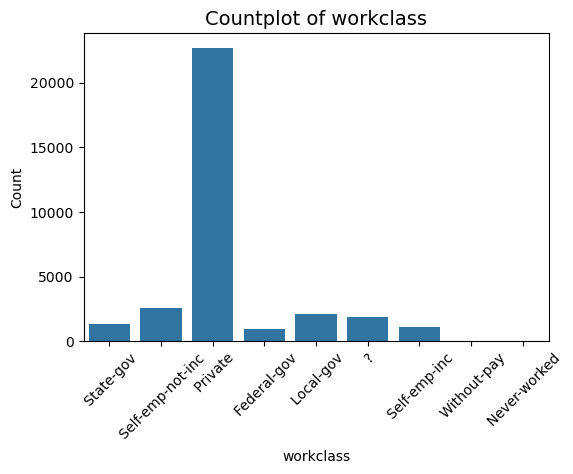

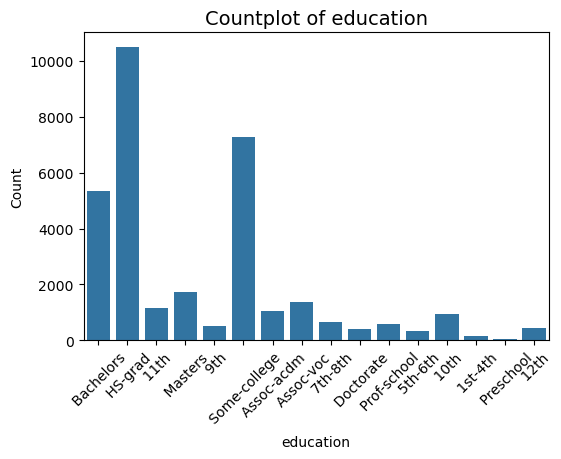

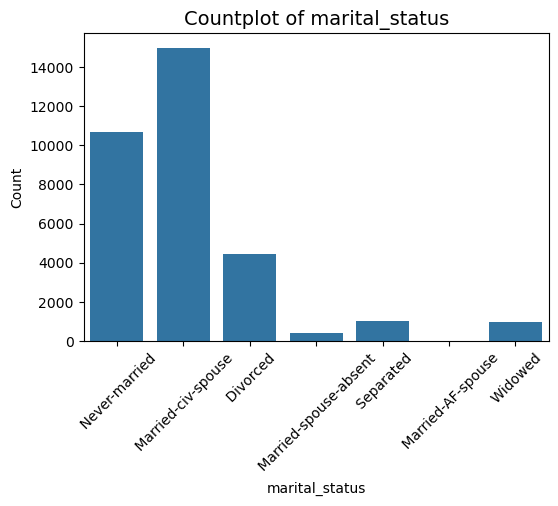

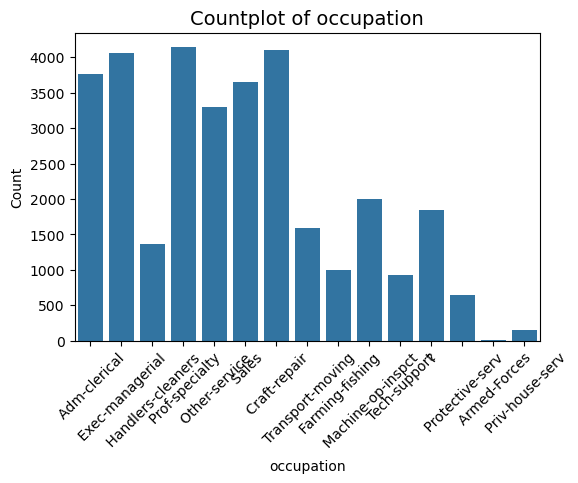

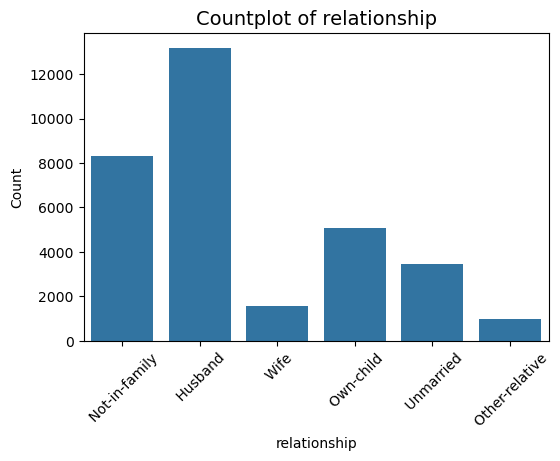

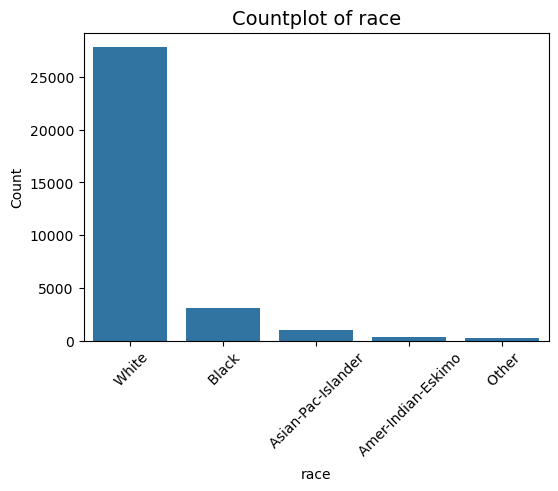

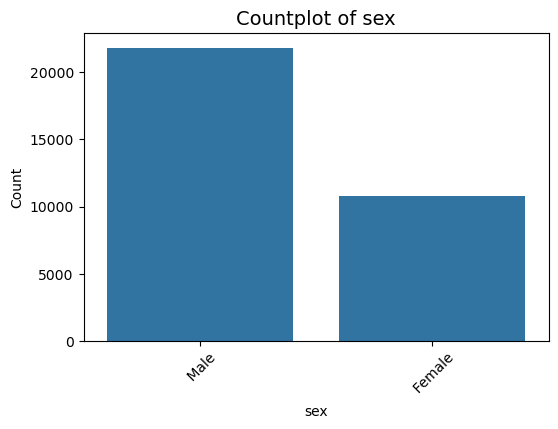

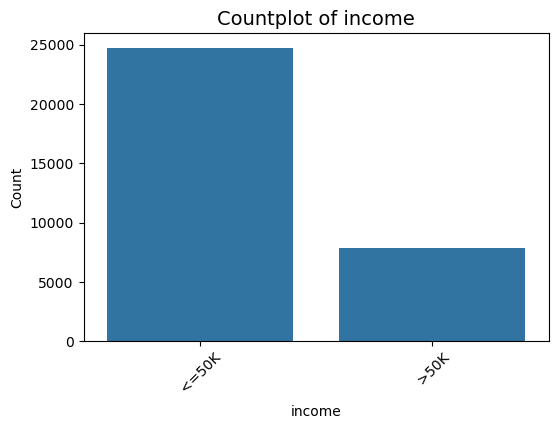

In [41]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df_temp)
    plt.title(f"Countplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

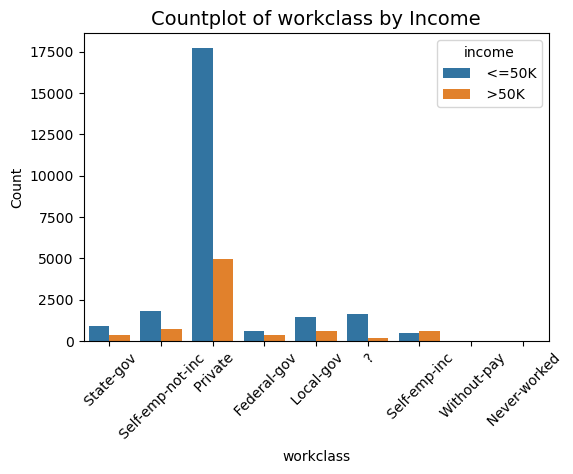

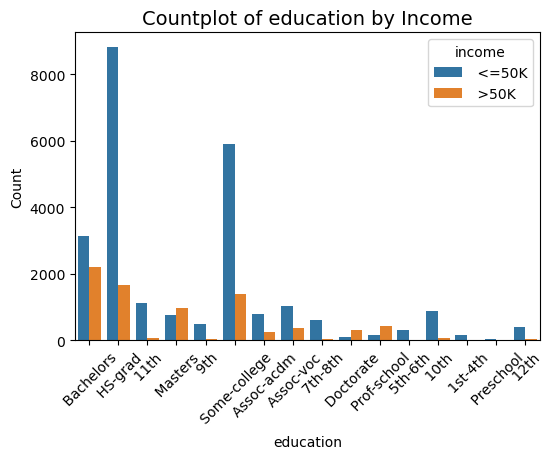

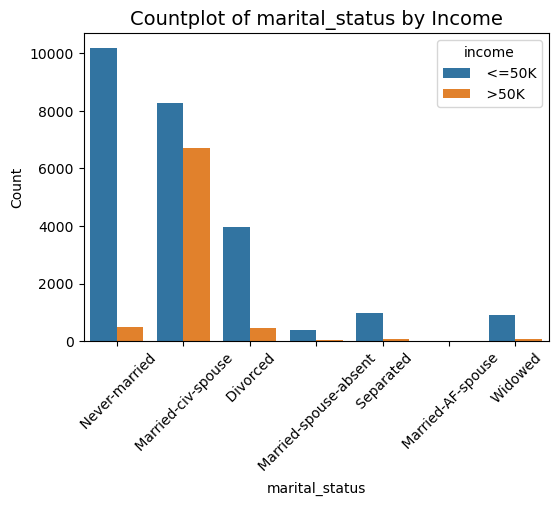

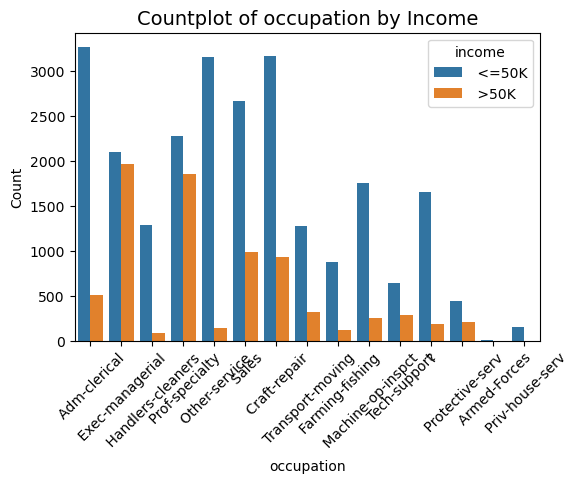

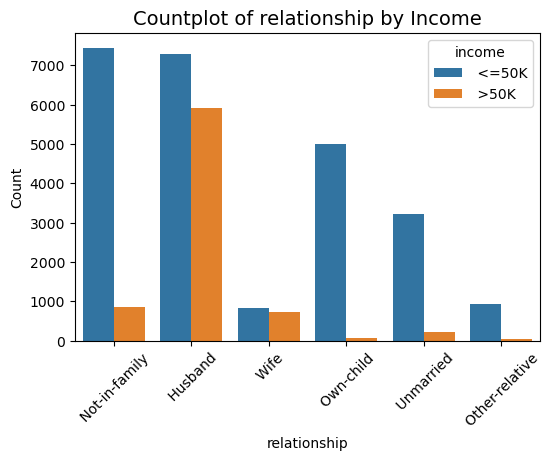

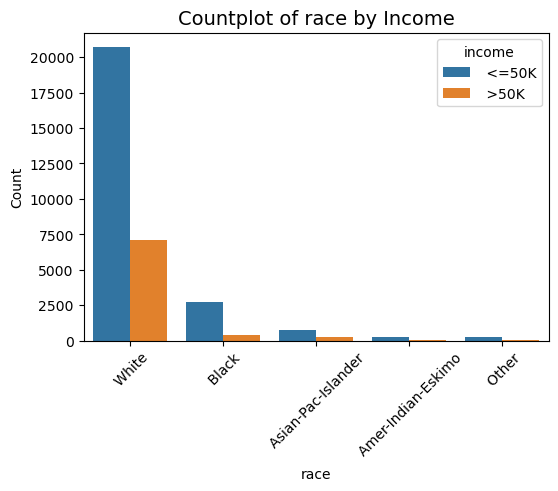

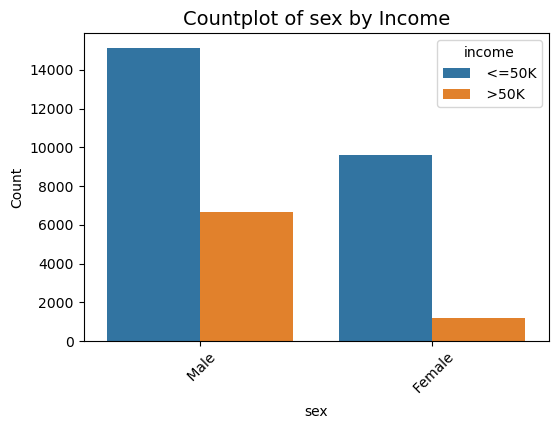

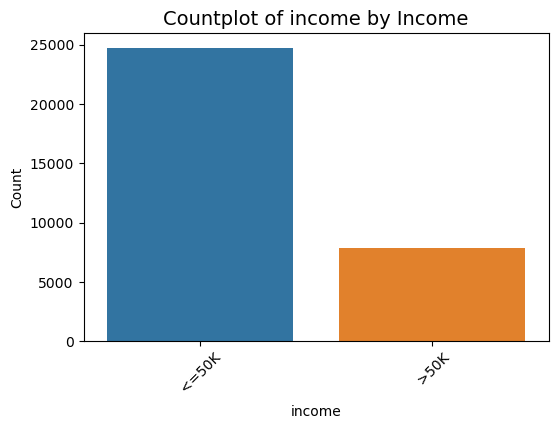

In [46]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='income', data=df)
    plt.title(f"Countplot of {col} by Income", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

onehot_cols = [c for c in categorical_cols if df[c].nunique() < 5 and c != 'income']

label_cols = [c for c in categorical_cols if df[c].nunique() >= 5 and c != 'income']


In [54]:
le = LabelEncoder()
df_encoded = df.copy()
for c in label_cols:
    df_encoded[c] = le.fit_transform(df_encoded[c])

In [56]:
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)

df_encoded['income'] = LabelEncoder().fit_transform(df_encoded['income'])

print("After encoding:", df_encoded.shape)

df_encoded.head()


After encoding: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Male
0,39,7,77516,9,13,4,1,1,4,2174,0,40,United-States,0,True
1,50,6,83311,9,13,2,4,0,4,0,0,13,United-States,0,True
2,38,4,215646,11,9,0,6,1,4,0,0,40,United-States,0,True
3,53,4,234721,1,7,2,6,0,2,0,0,40,United-States,0,True
4,28,4,338409,9,13,2,10,5,2,0,0,40,Cuba,0,False


One-Hot

Pros: no ordinality assumed, interpretable, good for tree or linear models.

Cons: high dimensionality if many categories → sparsity, memory.

Label Encoding

Pros: compact, fast, keeps single column.

Cons: introduces artificial ordinal relationship (not suitable for linear models unless categories truly ordinal). Use with tree models or with care.

final dataframe

In [59]:
final_df = df_encoded.copy()

standard scalar is taken 

In [62]:
final_df[numeric_cols] = df_standard[numeric_cols]

In [64]:
print("Final preprocessed dataset shape:", final_df.shape)
final_df.head()

Final preprocessed dataset shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Male
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,0.148453,-0.21666,-0.035429,United-States,0,True
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,-0.145920,-0.21666,-2.222153,United-States,0,True
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,-0.145920,-0.21666,-0.035429,United-States,0,True
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,-0.145920,-0.21666,-0.035429,United-States,0,True
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,-0.145920,-0.21666,-0.035429,Cuba,0,False


In [66]:
final_df.rename(columns={'sex_ Male': 'sex'}, inplace=True)

In [68]:
print(final_df[['sex']].head())

     sex
0   True
1   True
2   True
3   True
4  False


In [70]:
final_df['sex'] = final_df['sex'].astype(int)

In [72]:
print(final_df['sex'].value_counts())

sex
1    21790
0    10771
Name: count, dtype: int64


new features -- capital_diff,hours_category

In [75]:
final_df['capital_diff'] = final_df['capital_gain'] - final_df['capital_loss']

In [77]:
final_df['hours_category'] = pd.cut(
    final_df['hours_per_week'],
    bins=[0, 35, 45, 100],
    labels=['Low', 'Medium', 'High']
)

In [79]:
le = LabelEncoder()
final_df['hours_category'] = le.fit_transform(final_df['hours_category'])

In [81]:
final_df[numeric_cols].skew().sort_values(ascending=False)

capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

applying log transformations

In [84]:
final_df['capital_gain_log'] = np.log1p(final_df['capital_gain'])

In [86]:
print(final_df[['capital_gain', 'capital_gain_log', 'capital_diff', 'hours_category']].head())

   capital_gain  capital_gain_log  capital_diff  hours_category
0      0.148453          0.138416      0.365112               1
1     -0.145920         -0.157731      0.070739               1
2     -0.145920         -0.157731      0.070739               1
3     -0.145920         -0.157731      0.070739               1
4     -0.145920         -0.157731      0.070739               1


isolation forest

In [90]:
from sklearn.ensemble import IsolationForest

In [91]:
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(final_df[numeric_cols])

final_df_clean = final_df[outliers == 1]



In [93]:
print("Original shape:", final_df.shape)
print("After removing outliers:", final_df_clean.shape)

Original shape: (32561, 18)
After removing outliers: (30933, 18)


as ppscore library is not installed properly I couldn't complete the task 4